# Final Project 3: Ensemble
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

## Introduction

### Our Members:
1. Ahmad Firdaus Zulva
2. Notasonda Soni Putra
3. Windy Mega Melani

### Abstract

<p style='text-align: justify;'>
    Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. </p>

<p style='text-align: justify;'>
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet dan obesitas yang tidak sehat, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.</p>
    
<p style='text-align: justify;'>
Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.</p>



### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data" style="text-decoration: none;"><b style="font-style: italic">Heart Failure Prediction</b></a> :
<br><br>
Dataset ini terdiri dari 13 atribut dengan 299 rows. Dalam kasus ini target dari hasil prediksi keselamatan pasien dari penyakit jantung adalah DEATH_EVENT atau kematian</p>

<ul style="text-transform: capitalize">
    <li>age: umur pasien</li>
    <li>anaemia: apakah ada pengurangan haemoglobin</li>
    <li>creatinine_phosphokinase: level enzim CPK dalam mcg/L</li>
    <li>diabetes: apakah pasien punya riwayat diabetes</li>
    <li>ejection_fraction: persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung</li>
    <li>high_blood_pressure: apakah pasien punya darah tinggi</li>
    <li>platelets: jumlah platelet di darah dalam kiloplatelets/mL</li>
    <li>serum_creatinine: level serum creatinine di darah dalam mg/dL</li>
    <li>serum_sodium: level serum sodium di darah dalam mEq/L</li>
    <li>sex: apakah pasien pria atau wanita</li>
    <li>smoking: apakah pasien merokok</li>
    <li>time: waktu dalam hari untuk follow-up</li>
    <li>DEATH_EVENT: apakah pasien sudah meninggal saat waktu follow-up</li>
</ul>



### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
<ul style="text-transform: capitalize">
    <li>Mampu memahami konsep Classification dengan Ensemble Model</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam Ensemble Model</li>
    <li>Mampu mengimplementasikan Ensemble Model untuk membuat prediksi</li>
</ul>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# For Model Evaluation
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

random_state=0

# Style Text
bold = '\033[1m'
normal = '\033[0m'

## Data Loading

### Import Data

In [2]:
# Mengambil Data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Untuk melihat isi kolom tanpa batasan
pd.set_option("display.max.columns", None)

### Load Dataset

In [3]:
# Melihat 5 data paling atas
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Melihat 5 data terbawah
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### Inspection of the amount of data held

#### Checking Row of Dataset

In [5]:
# Mendata Jumlah banyak data (baris)
len(df)

299

#### Checking Column of Dataset

In [6]:
# Mendata Jumlah banyaknya Kolom Pada Data
len(df.columns)

13

#### Conclusion

In [7]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",bold, len(df), normal, "dan jumlah kolom berjumlah",bold,len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari  299  dan jumlah kolom berjumlah  13


### Missing value inspection

In [8]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
age,0,0.0 %
anaemia,0,0.0 %
creatinine_phosphokinase,0,0.0 %
diabetes,0,0.0 %
ejection_fraction,0,0.0 %
high_blood_pressure,0,0.0 %
platelets,0,0.0 %
serum_creatinine,0,0.0 %
serum_sodium,0,0.0 %
sex,0,0.0 %


Dari hasil pengecekan <i>missing value</i> di dapatkan hasil yaitu tidak terdapat <i>missing value</i> pada setiap atribut

### Checking Unique Value

In [9]:
nunique_col = df.nunique().sort_values(ascending=False)
nunique_col = pd.DataFrame(nunique_col, columns = ["jumlah"])
nunique_col

,jumlah
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


### Checking Type of Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari pengecekan tipe data pada dataset, diketahui terdapat 2 tipe data yaitu:

<ul>
    <li>float</li>
    <li>integer</li>
</ul>

### Describe data

In [11]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning

### Data Inspection

#### Checking Duplicate Data

In [12]:
df.duplicated().sum()

0

Dari hasil pengecekan Data <i>Duplicate</i> di dapatkan hasil yaitu tidak terdapat Data yang sama (<i>Duplicate</i>)

#### Checking missing Value Data on target data

In [13]:
df['DEATH_EVENT'].isnull().sum()

0

Dari hasil pengecekan <i>Missing Value</i> di dapatkan hasil yaitu tidak terdapat <i>Missing Value</i> pada data target

### Change and Cheking

#### Change Column Name

In [14]:
df = df.rename(columns={
    'age':'usia',
    'creatinine_phosphokinase':'creatinin_fosfokinase', 
    'ejection_fraction':'fraksi_ejeksi', 
    'high_blood_pressure':'tekanan_darah_tinggi', 
    'serum_creatinine':'kreatinin_serum', 
    'serum_sodium':'sodium_serum',
    'sex':'jenis_kelamin',
    'smoking':'perokok',
    'DEATH_EVENT':'kematian'
})

Mengubah nama kolom pada data agar mempermudah dalam pengerjaan, berikut ini nama kolom yang diubah pada project ini:

<ul>
    <li>'age':'usia',</li>
    <li>'creatinine_phosphokinase':'creatinin_fosfokinase', </li>
    <li>'ejection_fraction':'fraksi_ejeksi', </li>
    <li>'high_blood_pressure':'tekanan_darah_tinggi', </li>
    <li>'serum_creatinine':'kreatinin_serum', </li>
    <li>'serum_sodium':'sodium_serum',</li>
    <li>'sex':'jenis_kelamin',</li>
    <li>'smoking':'perokok',</li>
    <li>'DEATH_EVENT':'kematian'</li>
</ul>

#### Checking Column Name

In [15]:
df.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Copy Previous Data

#### Copy Data

In [16]:
df_copy = df.copy()

#### Checking Data

In [17]:
df_copy.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Exploration

### Describe and Visualization Data

#### Describe Data

In [18]:
df_copy.describe()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari hasil descriptive data dapat disimpulkan sebagai berikut:

<ul>
    <b>Usia</b>
    <ul>
        <li>Rata-rata Usia pada <b>Pasien Penyakit Jantung</b> berkisar 60 Tahun</li>
        <li>Usia terendah pada <b>Pasien Penyakit Jantung</b> berada pada umur 40 Tahun</li>
        <li>Usia tertinggi pada <b>Pasien Penyakit Jantung</b> berada pada umur 95 Tahun</li>
    </ul>
    <b>Anemia</b>
    <ul>
        <li>Rata-rata nilai Anemia pada <b>Pasien Penyakit Jantung</b> berada di 0.431438</li>
        <li>Anemia terendah pada <b>Pasien Penyakit Jantung</b> berada di 0</li>
        <li>Anemia tertinggi pada <b>Pasien Penyakit Jantung</b> berada di 1.0</li>
    </ul>
    <b>Creatinin Fosfokinase</b>
    <ul>
        <li>Rata-rata Creatinin Fosfokinase pada <b>Pasien Penyakit Jantung</b> berada di 581.839465</li>
        <li>Creatinin Fosfokinase terendah pada <b>Pasien Penyakit Jantung</b> berada di 23.00</li>
        <li>Creatinin Fosfokinase tertinggi pada <b>Pasien Penyakit Jantung</b> berada di 7861.00</li>
    </ul>
    <b>Diabetes</b>
    <ul>
        <li>Rata-rata nilai Diabetes pada <b>Pasien Penyakit Jantung</b> berada di 0.418060</li>
        <li>Diabetes terendah pada <b>Pasien Penyakit Jantung</b> berada di 0</li>
        <li>Diabetes tertinggi pada <b>Pasien Penyakit Jantung</b> berada di 1.0</li>
    </ul>
    <b>Fraksi Ejeksi</b>
    <ul>
        <li>Rata-rata Fraksi Ejeksi pada <b>Pasien Penyakit Jantung</b> berada di 38.083612</li>
        <li>Fraksi Ejeksi terendah pada <b>Pasien Penyakit Jantung</b> berada di 14.00</li>
        <li>Fraksi Ejeksi tertinggi pada <b>Pasien Penyakit Jantung</b> berada di 80.00</li>
    </ul>
    <b>Tekanan Darah Tinggi</b>
    <ul>
        <li>Rata-rata nilai Tekanan Darah Tinggi pada <b>Pasien Penyakit Jantung</b> berada di 0.351171</li>
        <li>Tekanan Darah Tinggi terendah pada <b>Pasien Penyakit Jantung</b> berada di 0</li>
        <li>Tekanan Darah Tinggi tertinggi pada <b>Pasien Penyakit Jantung</b> berada di 1.0</li>
    </ul>
</ul>

#### Visualization Data - Histogram of Distribution Columns

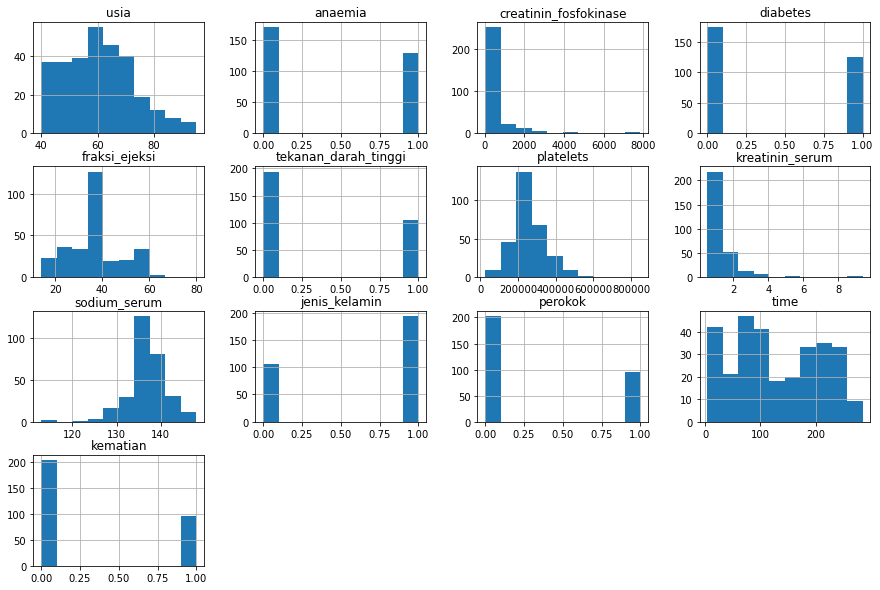

In [19]:
df_copy.hist(figsize=(15,10));

In [20]:
def visualisasi_distribusi_data(data_df, features, targetName='kematian', targetLabel=['No','Yes']):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_df[col][data_df[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 0].skew(), 2)),
            kde=True,
            color='g',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data_df[col][data_df[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 1].skew(), 2)),
            kde=True,
            color='b',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_df[targetName],
            y = data_df[col],
            hue = data_df[targetName])
        plt.subplot(133)
        stats.probplot(x=data_df[col], plot=plt)
        plt.tight_layout()
        plt.show()

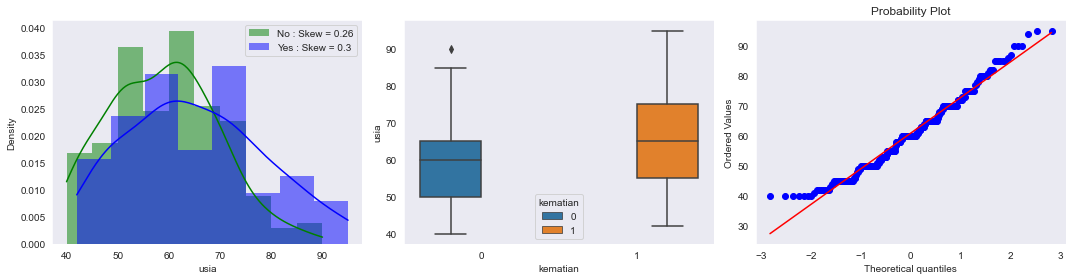

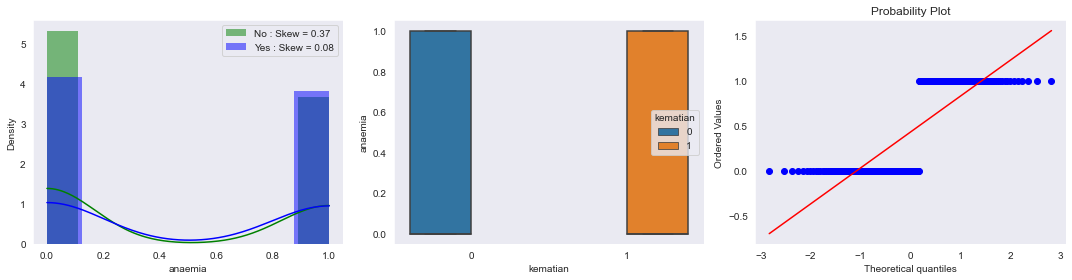

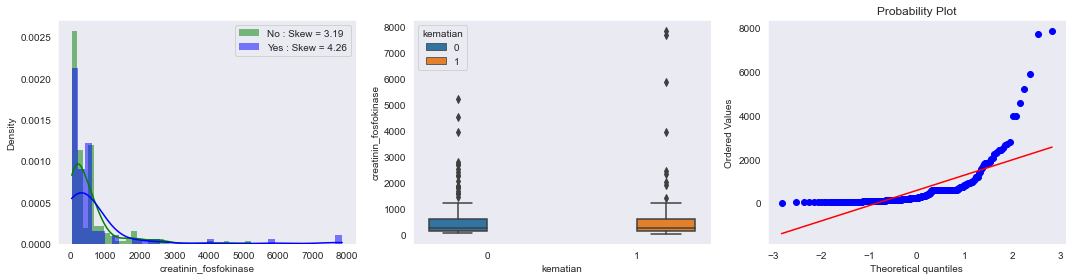

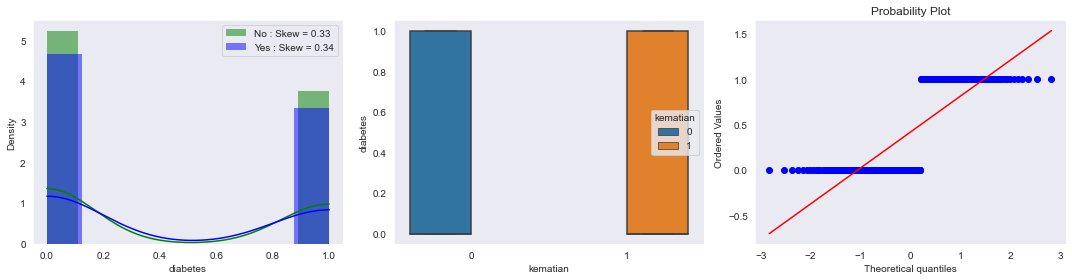

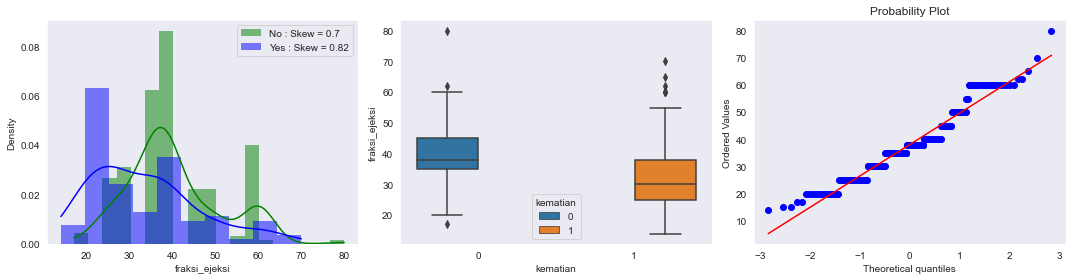

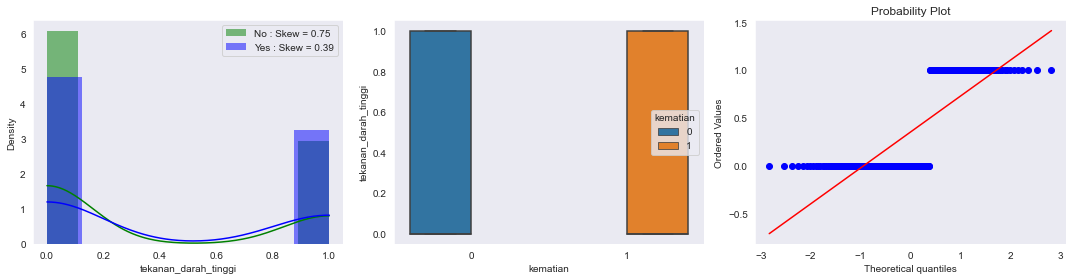

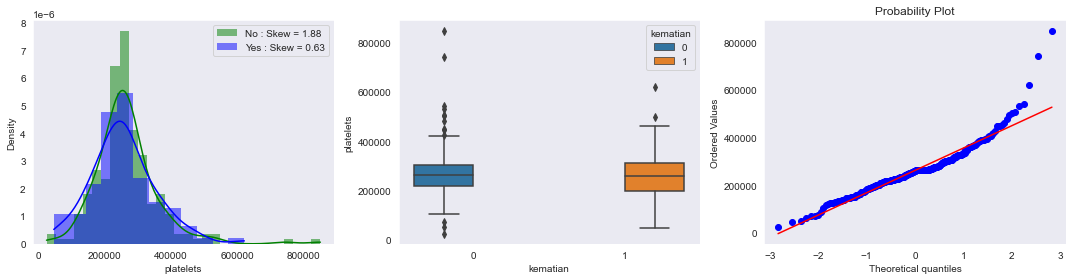

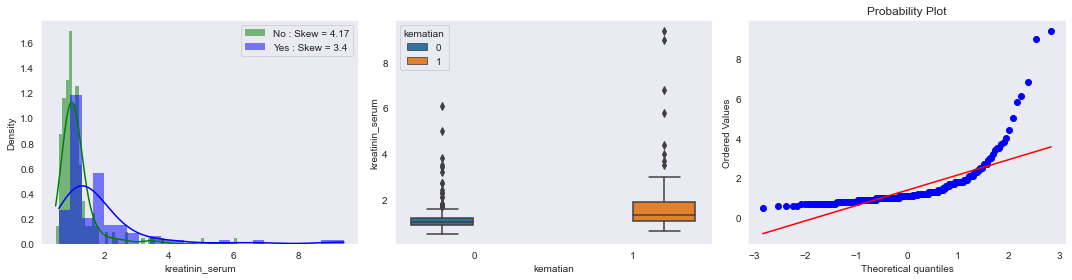

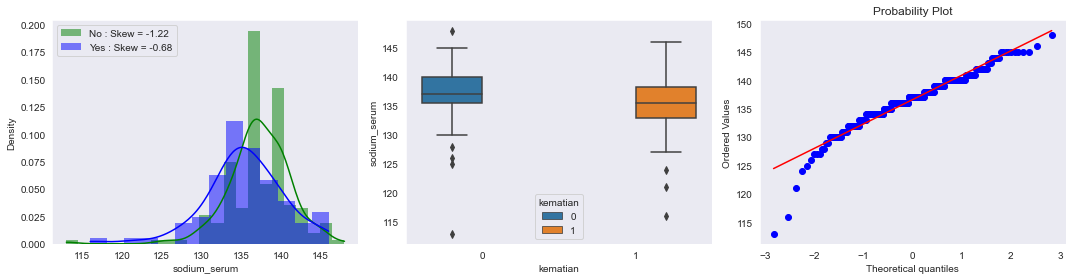

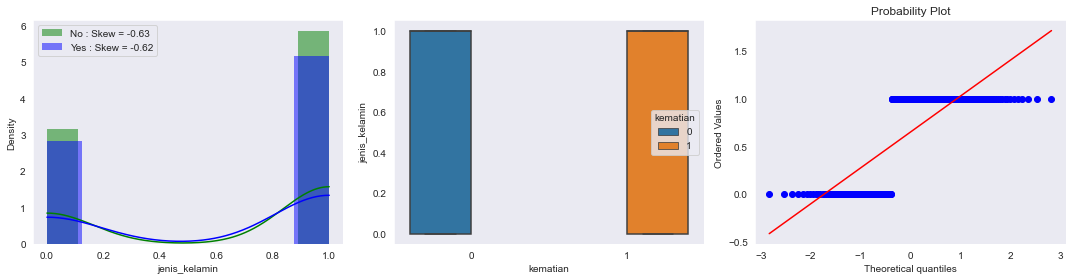

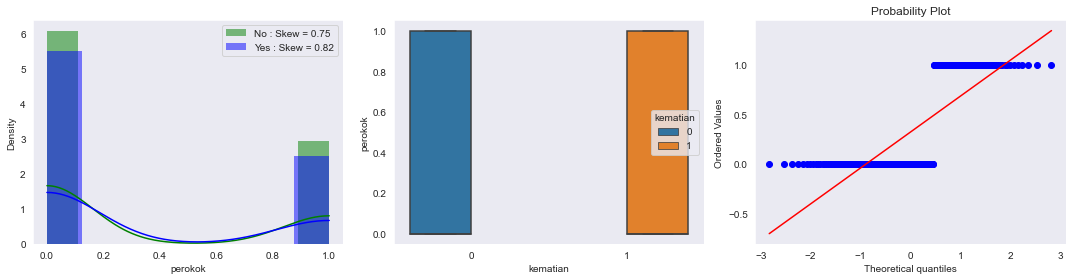

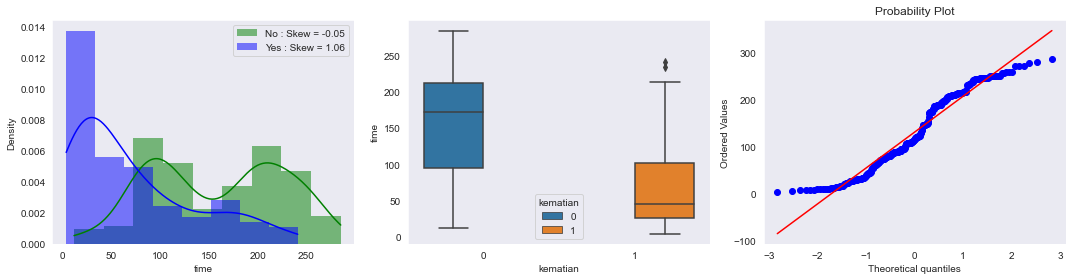

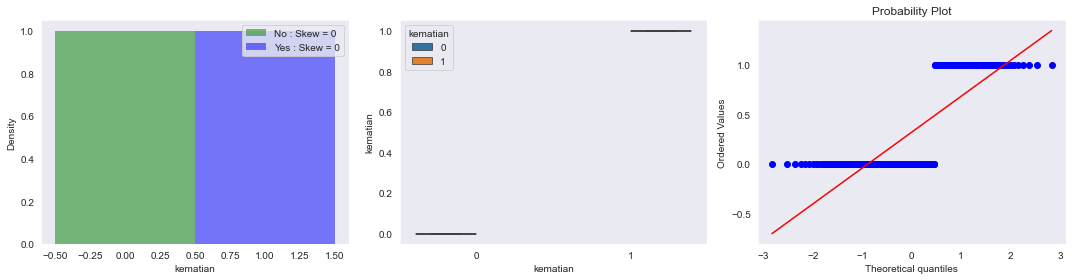

In [21]:
visualisasi_distribusi_data(df_copy,df_copy.columns.values)

### Correlation of each columns and Visualization

#### Correlation of each columns and

In [22]:
df_copy.corr()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
usia,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinin_fosfokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
fraksi_ejeksi,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
tekanan_darah_tinggi,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
kreatinin_serum,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
sodium_serum,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
jenis_kelamin,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### Visualization of each columns

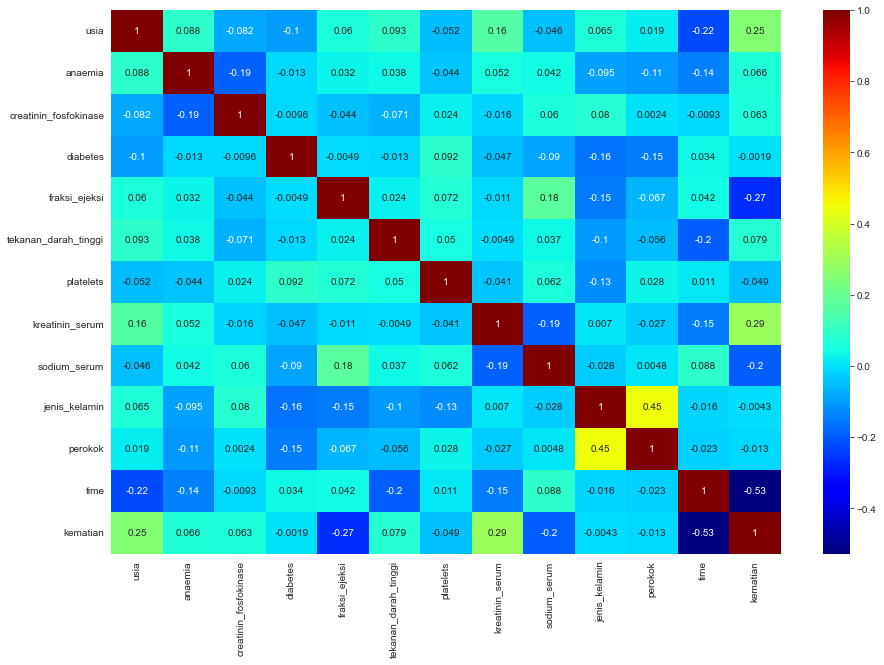

In [23]:
corr = df_copy.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap='jet');

### visualization of death rates

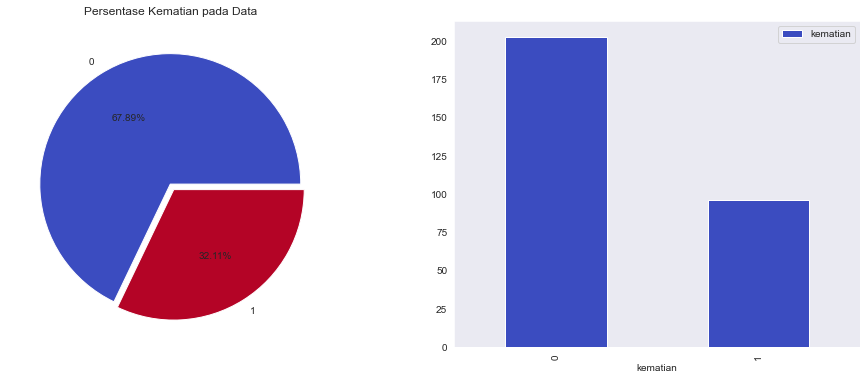

In [24]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "kematian"
df['kematian'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Kematian pada Data')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df_copy.groupby('kematian').agg({'kematian':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='coolwarm'
)

# Save Plot
plt.savefig("kematian.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')



## Data Preprocessing

Pada <i>section</i> ini berisi persiapan data dan pelatihan model, mulai dari <b><i>Scalling Data</b></i> dan melakukan <b><i>Splitting Data</b></i>. Data target yang akan di <b><i>Splitting Data</b></i> adalah <b>kematian</b>. Karena dalam <i>Project Overview</i> yang akan diprediksi adalah keselamatan pasien penyakit jantung, sehingga dari <i>Project Overview</i> tersebut dapat disimpulkan bahwasannya <b>kematian</b> layak dijadikan sebagai data target.

### Scaling and Splitting Data

#### Scaling Data

In [25]:
a = [i for i in df_copy.columns if i != 'kematian']

In [26]:
scaler = StandardScaler()
df_copy[a] = scaler.fit_transform(df_copy[a])
df_copy.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


#### Splitting Data

In [27]:
X = df_copy.drop('kematian', axis=1)
y = df_copy['kematian']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


### Train - Test Data Set-up

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=325)

## Model Definition

### Random Forest Classifier

In [29]:
mdl1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=random_state)

### Logistic Regression Classifier

In [30]:
mdl2= BaggingClassifier(LogisticRegression(random_state=random_state, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = random_state)

### XGBooster Classifier

In [31]:
mdl3= XGBClassifier()

### Gradient Booster Classifier

In [32]:
mdl4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=1, random_state=3)

### Extra Trees Classifier

In [33]:
mdl9=ExtraTreesClassifier(random_state=random_state)

### KNN Classifier

In [34]:
mdl11 = KNeighborsClassifier(n_neighbors=16)

### SVM Classifier

In [35]:
mdl13 = svm.SVC(kernel='linear')

## Model Evaluation 

### Evaluation model without using SMOTE

#### Random Forest Classifier

In [36]:
mdl1.fit(X_train, y_train)

y_pred1 = mdl1.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.74      0.50      0.60        28

    accuracy                           0.79        90
   macro avg       0.77      0.71      0.73        90
weighted avg       0.78      0.79      0.78        90



<AxesSubplot:>

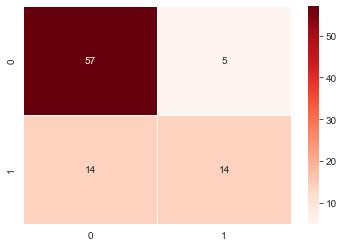

In [37]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### Logistic Regression Classifier

In [38]:
mdl2.fit(X_train, y_train)

y_pred2 = mdl2.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



<AxesSubplot:>

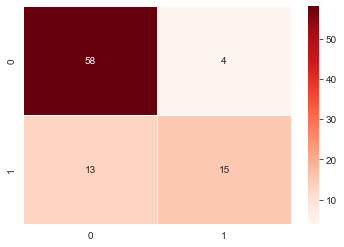

In [39]:
cm2= confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

####  XGBooster Classifier

In [40]:
mdl3.fit(X_train, y_train)

y_pred3 = mdl3.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred3)
print(classification_report(y_test,y_pred3))

[20:40:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        62
           1       0.64      0.64      0.64        28

    accuracy                           0.78        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.78      0.78      0.78        90



<AxesSubplot:>

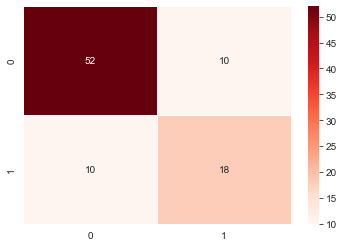

In [41]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### Gradient Booster Classifier

In [42]:
mdl4.fit(X_train, y_train)

y_pred4 = mdl4.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred4)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.71      0.61      0.65        28

    accuracy                           0.80        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.79      0.80      0.80        90



<AxesSubplot:>

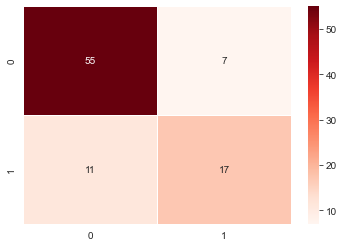

In [43]:
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### Extra Trees Classifier

In [44]:
mdl9.fit(X_train, y_train)

y_pred9 = mdl9.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred9)
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        62
           1       0.68      0.46      0.55        28

    accuracy                           0.77        90
   macro avg       0.74      0.68      0.70        90
weighted avg       0.76      0.77      0.75        90



<AxesSubplot:>

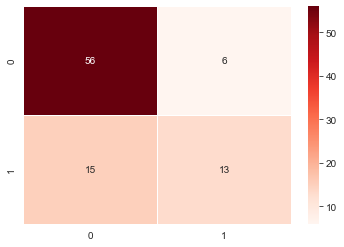

In [45]:
cm9 = confusion_matrix(y_test, y_pred9)
sns.heatmap(cm9, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### KNN Classifier

In [46]:
mdl11.fit(X_train, y_train)

y_pred11 = mdl11.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred11)
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        62
           1       0.60      0.11      0.18        28

    accuracy                           0.70        90
   macro avg       0.65      0.54      0.50        90
weighted avg       0.67      0.70      0.62        90



<AxesSubplot:>

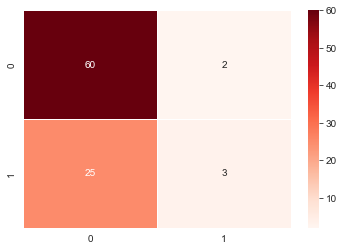

In [47]:
cm11 = confusion_matrix(y_test, y_pred11)
sns.heatmap(cm11, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

#### SVM Classifier

In [48]:
mdl13.fit(X_train, y_train)

y_pred13 = mdl13.predict(X_test)
# evaluasi model
confusion_matrix(y_test,y_pred13)
print(classification_report(y_test,y_pred13))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        62
           1       0.74      0.61      0.67        28

    accuracy                           0.81        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90



<AxesSubplot:>

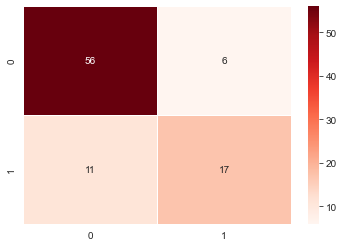

In [49]:
cm13 = confusion_matrix(y_test, y_pred13)
sns.heatmap(cm13, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

### Evaluation model using SMOTE

#### Data Preprocessing - SMOTE

In [50]:
smote_method = SMOTE()
X_s, y_s = smote_method.fit_resample(X, y)

In [51]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, stratify = y_s, test_size=0.3, random_state=5)

#### Model Definition - SMOTE

##### Random Forest Classifier

In [52]:
mdl5 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=random_state)

##### Logistic Regression Classifier

In [53]:
mdl6= BaggingClassifier(LogisticRegression(random_state=random_state, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = random_state)

##### XGBooster Classifier

In [54]:
mdl7= XGBClassifier()

##### Gradient Booster Classifier

In [55]:
mdl8 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

##### Extra Trees Classifier

In [56]:
mdl10=ExtraTreesClassifier(random_state=random_state)

##### KNN Classifier

In [57]:
mdl12 = KNeighborsClassifier(n_neighbors=16)

##### SVM Classifier

In [58]:
mdl14 = svm.SVC(kernel='linear')

#### Model Evaluation - SMOTE

##### Random Forest Classifier

In [59]:
mdl5.fit(X_train_s, y_train_s)

y_pred5 = mdl5.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred5)

print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred5),4),normal)

print(classification_report(y_test_s,y_pred5))

Akurasi :  0.8525 
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        61
           1       0.82      0.90      0.86        61

    accuracy                           0.85       122
   macro avg       0.86      0.85      0.85       122
weighted avg       0.86      0.85      0.85       122



<AxesSubplot:>

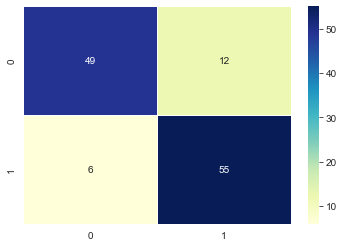

In [60]:
cm5 = confusion_matrix(y_test_s, y_pred5)
sns.heatmap(cm5, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### Logistic Regression Classifier¶

In [61]:
mdl6.fit(X_train_s, y_train_s)

y_pred6 = mdl6.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred6)

print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred6),4),normal)

print(classification_report(y_test_s,y_pred6))

Akurasi :  0.8197 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        61
           1       0.82      0.82      0.82        61

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



<AxesSubplot:>

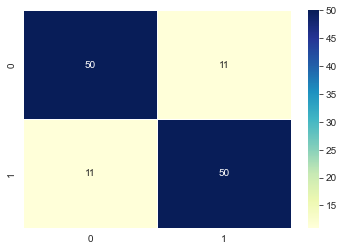

In [62]:
cm6 = confusion_matrix(y_test_s, y_pred6)
sns.heatmap(cm6, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### XGBooster Classifier

In [63]:
mdl7.fit(X_train_s, y_train_s)

y_pred7 = mdl7.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred7)

print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred7),4),normal)

print(classification_report(y_test_s,y_pred7))

[20:40:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Akurasi :  0.8689 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        61
           1       0.83      0.93      0.88        61

    accuracy                           0.87       122
   macro avg       0.88      0.87      0.87       122
weighted avg       0.88      0.87      0.87       122



<AxesSubplot:>

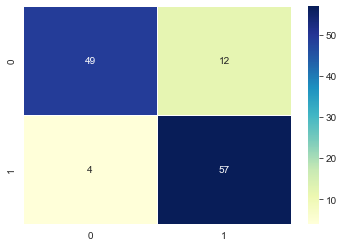

In [64]:
cm7 = confusion_matrix(y_test_s, y_pred7)
sns.heatmap(cm7, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### Gradient Booster Classifier

In [65]:
mdl8.fit(X_train_s, y_train_s)

y_pred8 = mdl8.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred8)

print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred8),4),normal)

print(classification_report(y_test_s,y_pred8))

Akurasi :  0.8361 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.81      0.89      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



<AxesSubplot:>

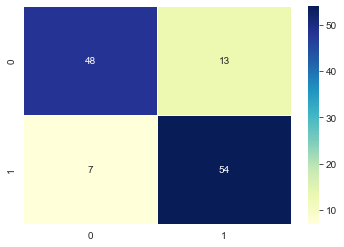

In [66]:
cm8 = confusion_matrix(y_test_s, y_pred8)
sns.heatmap(cm8, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### Extra Trees Classifier

In [73]:
mdl10.fit(X_train_s, y_train_s)

y_pred10 = mdl10.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred10)

print('Akurasi :', bold,round((accuracy_score(y_test_s, y_pred10)*100),2),"%",normal)

print(classification_report(y_test_s,y_pred10))

Akurasi :  89.34 % 
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        61
           1       0.86      0.93      0.90        61

    accuracy                           0.89       122
   macro avg       0.90      0.89      0.89       122
weighted avg       0.90      0.89      0.89       122



<AxesSubplot:>

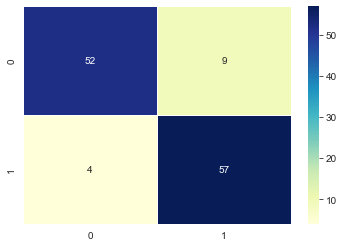

In [68]:
cm10 = confusion_matrix(y_test_s, y_pred10)
sns.heatmap(cm10, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### KNN Classifier

In [69]:
mdl12.fit(X_train_s, y_train_s)

y_pred12 = mdl12.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred12)
print(classification_report(y_test_s,y_pred12))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        61
           1       0.80      0.74      0.77        61

    accuracy                           0.78       122
   macro avg       0.78      0.78      0.78       122
weighted avg       0.78      0.78      0.78       122



<AxesSubplot:>

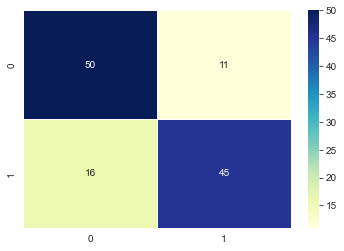

In [70]:
cm12 = confusion_matrix(y_test_s, y_pred12)
sns.heatmap(cm12, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

##### SVM Classifier

In [71]:
mdl14.fit(X_train_s, y_train_s)

y_pred14 = mdl14.predict(X_test_s)
# evaluasi model
confusion_matrix(y_test_s,y_pred14)

print('Akurasi :', bold,round(accuracy_score(y_test_s, y_pred14),4),normal)

print(classification_report(y_test_s,y_pred14))

Akurasi :  0.8443 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.85      0.84      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



<AxesSubplot:>

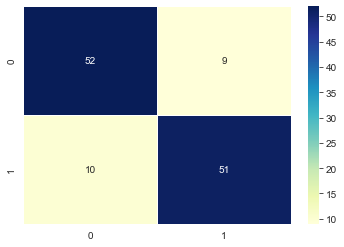

In [72]:
cm14 = confusion_matrix(y_test_s, y_pred14)
sns.heatmap(cm14, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

## Conclusions